In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [13]:
from sklearn.model_selection import train_test_split

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

In [14]:
# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 445,322 (1.70 MB)

 Trainable params: 445,322 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train with validation set
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9947 - loss: 0.0152 - val_accuracy: 0.9875 - val_loss: 0.0451
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9955 - loss: 0.0122 - val_accuracy: 0.9912 - val_loss: 0.0380
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9976 - loss: 0.0070 - val_accuracy: 0.9903 - val_loss: 0.0437
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9971 - loss: 0.0096 - val_accuracy: 0.9855 - val_loss: 0.0606
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9913 - val_loss: 0.0478


In [18]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0519
Test accuracy: 0.9920


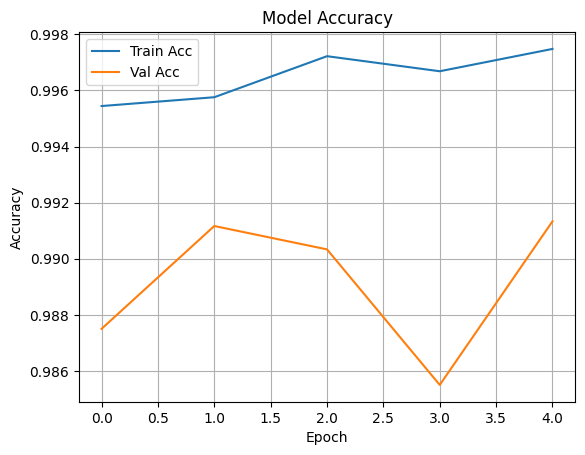

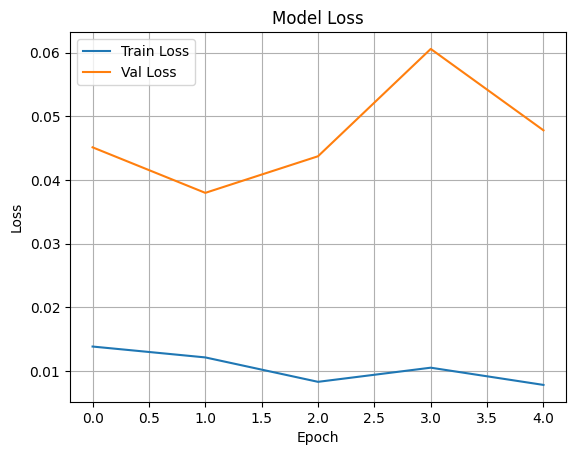

In [19]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

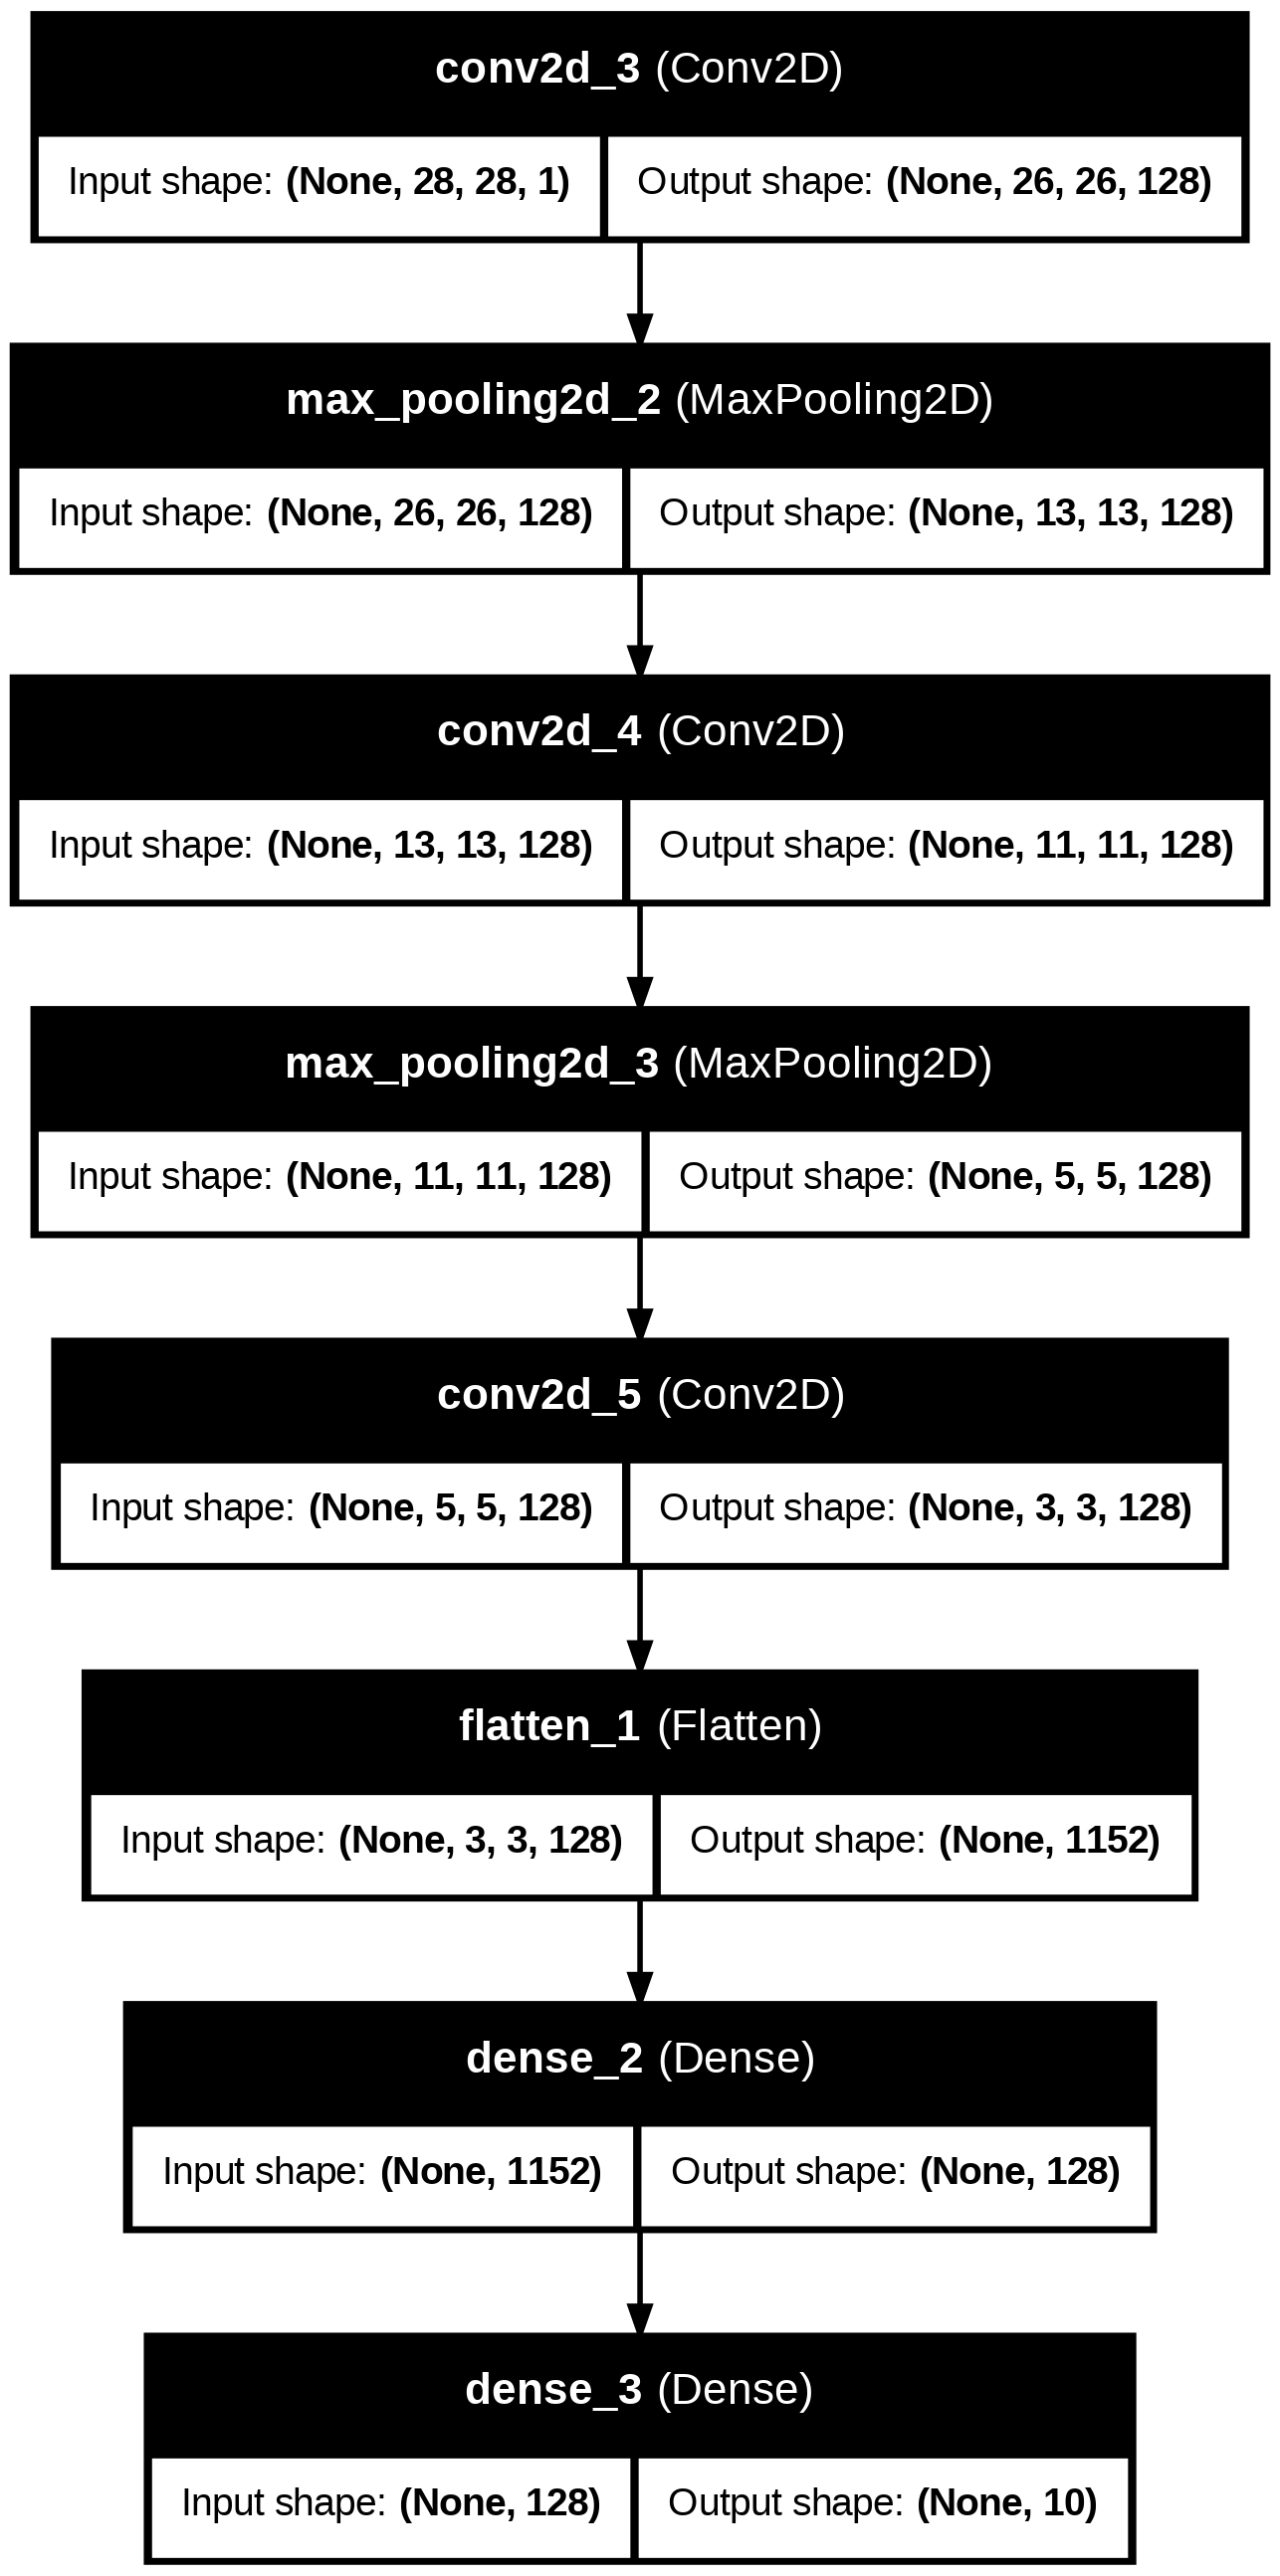

In [20]:
from tensorflow.keras.utils import plot_model

# Model architecture diagram
plot_model(model, to_file='cnn_mnist_model.png', show_shapes=True, show_layer_names=True)

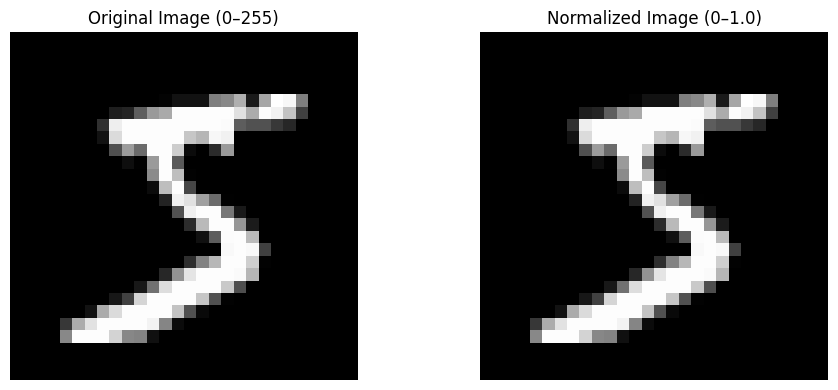

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load raw MNIST data
(x_train, _), _ = mnist.load_data()

# Pick one image
raw_image = x_train[0]

# Normalize the image
normalized_image = raw_image / 255.0

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Raw image
axs[0].imshow(raw_image, cmap='gray')
axs[0].set_title("Original Image (0–255)")
axs[0].axis('off')

# Normalized image
axs[1].imshow(normalized_image, cmap='gray')
axs[1].set_title("Normalized Image (0–1.0)")
axs[1].axis('off')

plt.tight_layout()
plt.show()